In [10]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
ecommerce = pd.read_csv('ecommerce_customer_churn_dataset.csv')
ecommerce.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [12]:
col = ['Login_Frequency', 
       'Session_Duration_Avg', 
       'Pages_Per_Session', 
       'Total_Purchases']
# Clean all N/A 
clean_df = ecommerce[col].dropna()
clean_df

,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Total_Purchases
0,14.0,27.4,6.0,9.0
1,15.0,42.7,10.3,19.5
2,10.0,24.8,1.6,9.1
3,10.0,38.4,14.8,15.0
5,6.0,21.9,6.9,12.0
...,...,...,...,...
49994,8.0,21.0,8.4,16.0
49995,10.0,35.8,8.8,13.0
49996,21.0,32.4,9.6,15.0
49997,19.0,40.3,10.4,12.0


In [13]:
# Is website making consumers buy? 
features = ['Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session']
X = clean_df[features]
y = clean_df['Total_Purchases']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=0)

scale = StandardScaler() 
X_train_scale = scale.fit_transform(X_train) 
X_test_scale = scale.transform(X_test) 

knn = KNeighborsRegressor(n_neighbors = 10) 
knn.fit(X_train_scale, y_train)

y_knn_pred = knn.predict(X_test_scale) 

knn_mse = mean_squared_error(y_test, y_knn_pred) 
knn_r2 = r2_score(y_test, y_knn_pred) 

print(f'KNN MSE: {knn_mse:.4f}') 
print(f'KNN r2: {knn_r2:.4f}')

KNN MSE: 27.0899
KNN r2: 0.4414


<function matplotlib.pyplot.show(close=None, block=None)>

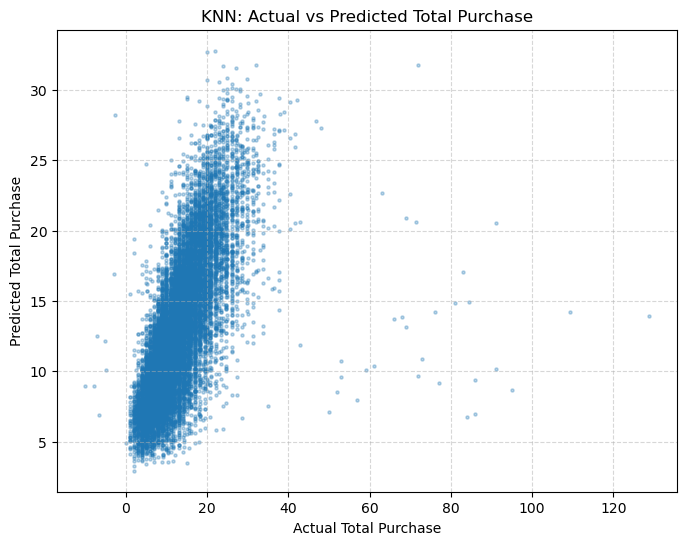

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_knn_pred, alpha=0.3, s=5) 
plt.xlabel('Actual Total Purchase') 
plt.ylabel('Predicted Total Purchase') 
plt.title('KNN: Actual vs Predicted Total Purchase') 
plt.grid(True, linestyle='--', alpha=0.5)
plt.show

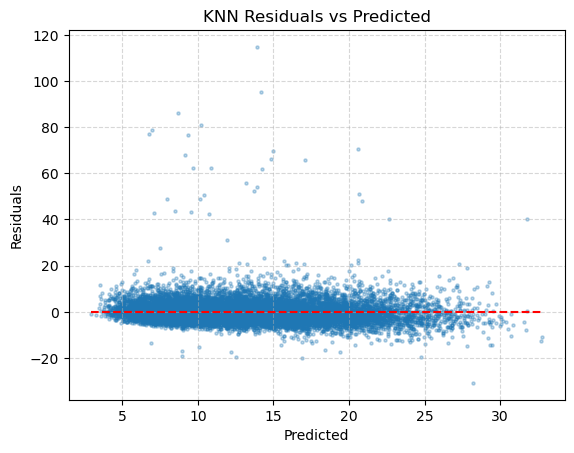

In [15]:
# Residual analysis
knn_residuals = y_test - y_knn_pred
plt.scatter(y_knn_pred, knn_residuals, alpha=0.3, s=5)
plt.hlines(y=0, xmin=min(y_knn_pred), xmax=max(y_knn_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('KNN Residuals vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred) 

print(f'LR MSE: {lr_mse:.4f}') 
print(f'LR r2: {lr_r2:.4f}')

LR MSE: 24.7284
LR r2: 0.4901


<function matplotlib.pyplot.show(close=None, block=None)>

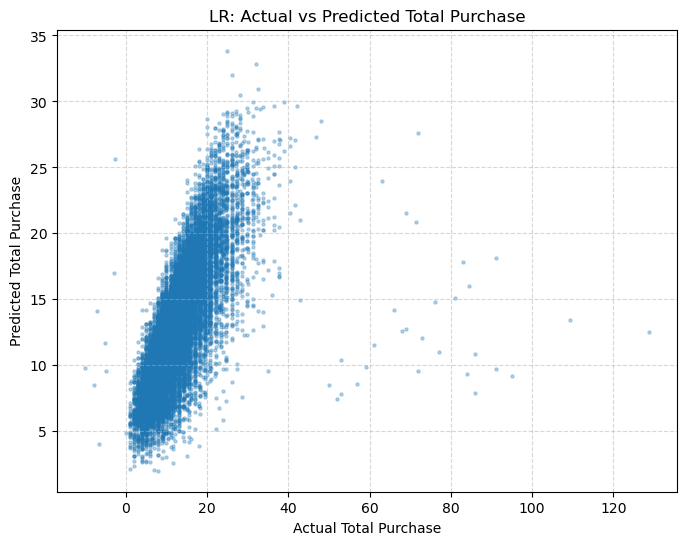

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_lr_pred, alpha=0.3, s=5) 
plt.xlabel('Actual Total Purchase') 
plt.ylabel('Predicted Total Purchase') 
plt.title('LR: Actual vs Predicted Total Purchase') 
plt.grid(True, linestyle='--', alpha=0.5)
plt.show



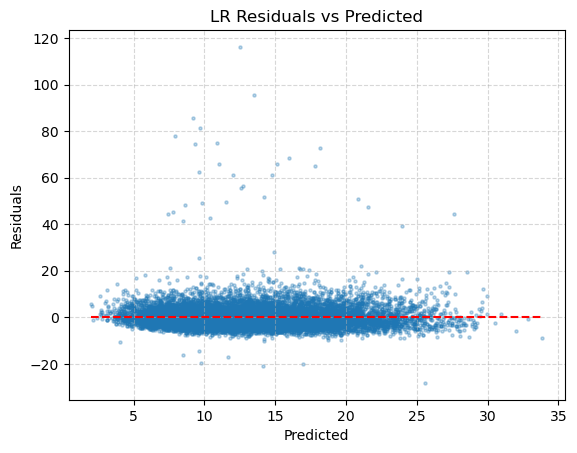

In [18]:
# Residual analysis
lr_residuals = y_test - y_lr_pred
plt.scatter(y_lr_pred, lr_residuals, alpha=0.3, s=5)
plt.hlines(y=0, xmin=min(y_lr_pred), xmax=max(y_lr_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('LR Residuals vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [19]:
# Model Comparison

lr_results = pd.DataFrame(['Linear Regression', lr_mse, lr_r2]).transpose()
lr_results.columns = ['Method', 'MSE', 'R2']

knn_results = pd.DataFrame(['KNN', knn_mse, knn_r2]).transpose()
knn_results.columns = ['Method', 'MSE', 'R2']

df_models = pd.concat([lr_results, knn_results], axis = 0).reset_index(drop=True)
df_models

,Method,MSE,R2
0,Linear Regression,24.728423,0.490079
1,KNN,27.089865,0.441384


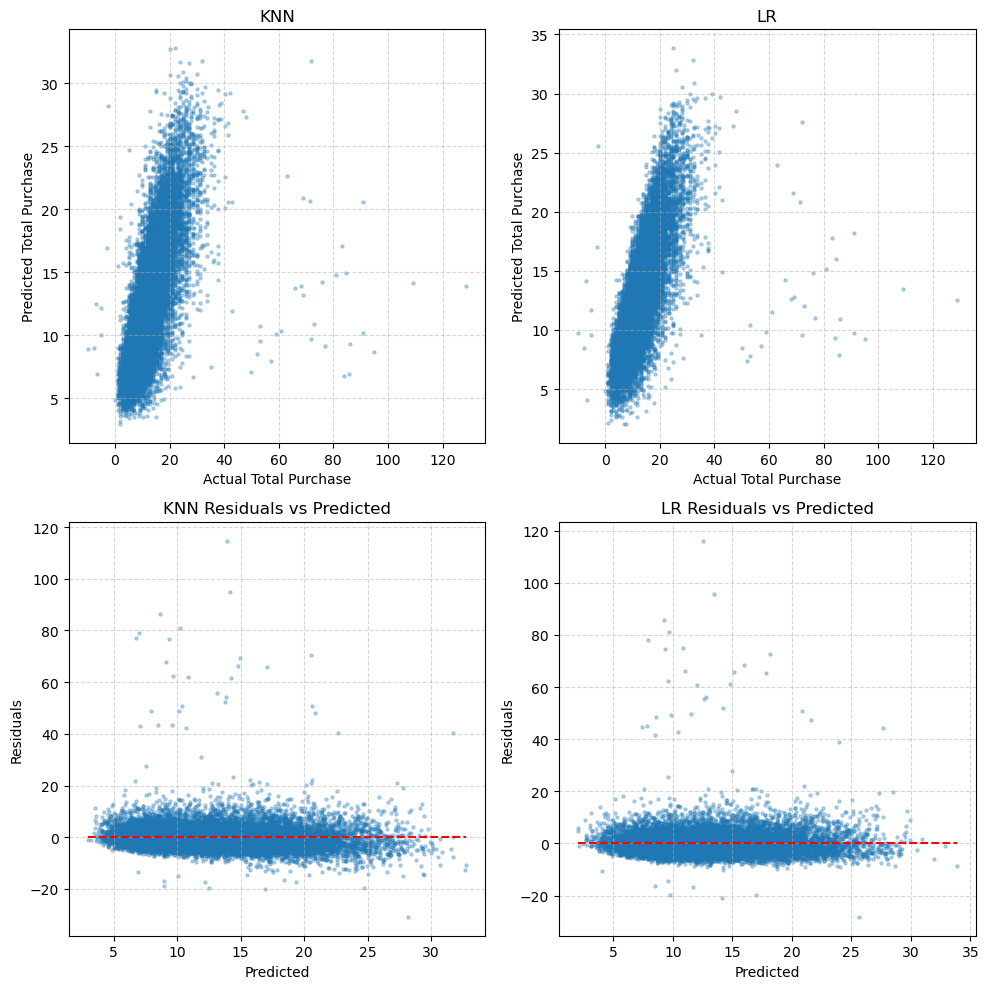

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# KNN prediction plot
axes[0, 0].scatter(y_test, y_knn_pred, alpha=0.3, s=5) 
axes[0, 0].set_title("KNN")
axes[0, 0].set_xlabel('Actual Total Purchase') 
axes[0, 0].set_ylabel('Predicted Total Purchase') 
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# LR prediction plot
axes[0, 1].scatter(y_test, y_lr_pred, alpha=0.3, s=5) 
axes[0, 1].set_title("LR")
axes[0, 1].set_xlabel('Actual Total Purchase') 
axes[0, 1].set_ylabel('Predicted Total Purchase') 
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

#---------Residual----------

#KNN residual plot
knn_residuals = y_test - y_knn_pred
axes[1, 0].scatter(y_knn_pred, knn_residuals, alpha=0.3, s=5)
axes[1, 0].hlines(y=0, xmin=min(y_knn_pred), xmax=max(y_knn_pred), colors='r', linestyles='dashed')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('KNN Residuals vs Predicted')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# LR residual plot
lr_residuals = y_test - y_lr_pred
axes[1, 1].scatter(y_lr_pred, lr_residuals, alpha=0.3, s=5)
axes[1, 1].hlines(y=0, xmin=min(y_lr_pred), xmax=max(y_lr_pred), colors='r', linestyles='dashed')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('LR Residuals vs Predicted')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()

plt.show()

In [21]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
print(coefficients)

lr = LinearRegression()
cv_r2 = cross_val_score(lr, X, y, cv=5, scoring='r2')  # 5-fold CV
print(f'Cross-validated R²: {np.mean(cv_r2):.4f}')

                Feature  Coefficient
0       Login_Frequency     0.167497
1  Session_Duration_Avg     0.224326
2     Pages_Per_Session     0.445360
Cross-validated R²: 0.4946


<function matplotlib.pyplot.show(close=None, block=None)>

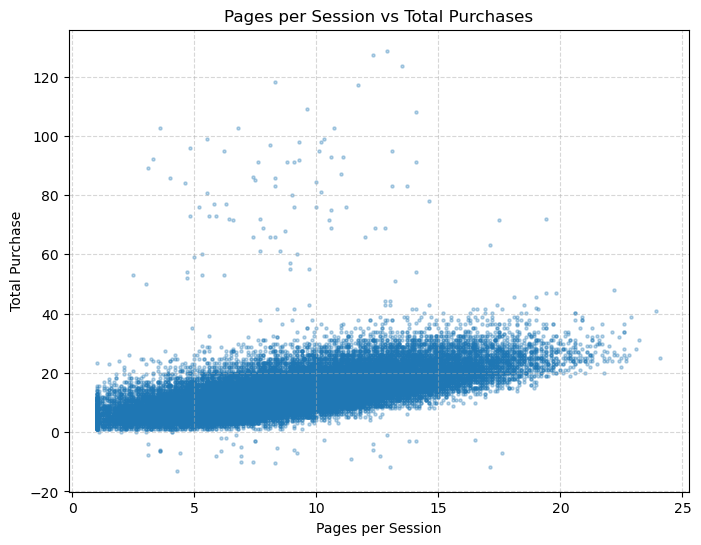

In [26]:
# Simple comparison between Pages_Per_Session and Total_Purchases
pps = clean_df['Pages_Per_Session']
plt.figure(figsize=(8,6))
plt.scatter(pps, y, alpha=0.3, s=5)
plt.xlabel('Pages per Session')
plt.ylabel('Total Purchase')
plt.title('Pages per Session vs Total Purchases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show